In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    completeness_score
)
from sklearn.model_selection import RandomizedSearchCV

ЛАБОРАТОРНАЯ РАБОТА №6. «ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ. ЗАДАЧА КЛАСТЕРИЗАЦИИ»

ЗАДАНИЕ №1
1. Сгенерировать 3 датасета (make_classification или make_blobs)
2. Провести визуализацию
3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гиперпараметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

ЗАДАНИЕ №2.
1. На основе датасета для задачи классификации построить модель кластеризации, используя три метода: k-means; иерархическая кластеризация; DBSCAN.
2. Произвести визуализацию построенных моделей.
3. Выполнить оценку качества полученных моделей кластеризации. Сравнить полученные результаты.

ЗАДАНИЕ №3*.
Реализовать алгоритма DBSCAN и с его помощью провести кластеризацию всех датасетов Лаб_работы №6.

In [2]:
from sklearn.datasets import make_classification

## Сгенерировать 3 датасета

In [3]:
# Датасет 1 - make_classification
X1, y1 = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Датасет 2 - make_blobs
X2, y2 = make_blobs(
    n_samples=500, n_features=2, centers=4, cluster_std=1.5, center_box=(-10.0, 10.0), random_state=42
)

# Датасет 3 - make_blobs
X3, y3 = make_blobs(
    n_samples=500, n_features=2, centers=3, cluster_std=[1.0, 2.5, 0.5], center_box=(-10.0, 10.0), random_state=42
)

## Визуализация датасетов:

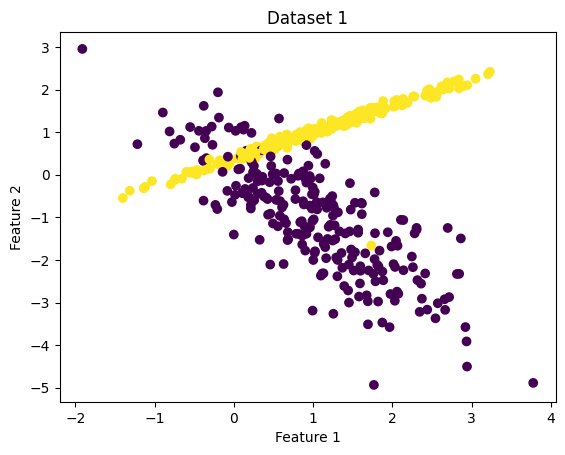

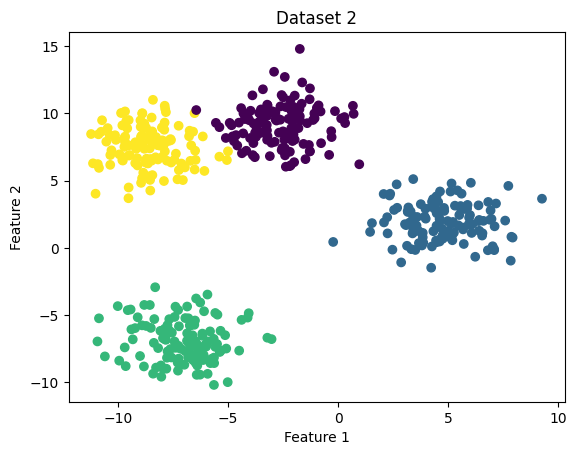

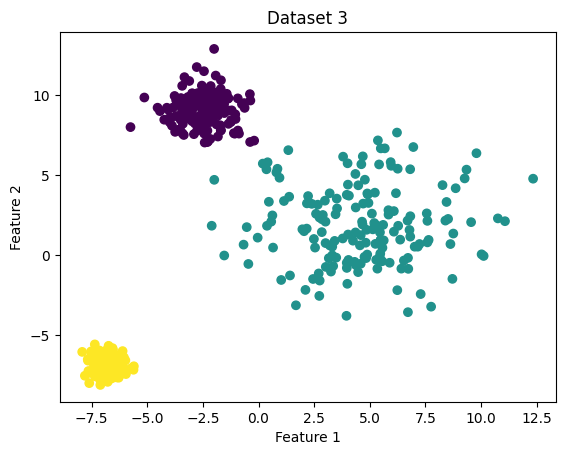

In [4]:
# Визуализация датасета 1
plt.figure(1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.title("Dataset 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Визуализация датасета 2
plt.figure(2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.title("Dataset 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Визуализация датасета 3
plt.figure(3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.title("Dataset 3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

## Провести кластеризацию

# KMeans

In [5]:
from sklearn.model_selection import GridSearchCV
kmeans1 = KMeans(n_init=10, random_state=42) 
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(kmeans1, parameters)
grid_search.fit(X1)
best_kmeans = grid_search.best_estimator_
y_pred1_km = best_kmeans.fit_predict(X1)

kmeans2 = KMeans(n_init=10, random_state=42) 
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(kmeans2, parameters)
grid_search.fit(X2)
best_kmeans = grid_search.best_estimator_
y_pred2_km = best_kmeans.fit_predict(X2)

kmeans3 = KMeans(n_init=10, random_state=42) 
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(kmeans3, parameters)
grid_search.fit(X3)
best_kmeans = grid_search.best_estimator_
y_pred3_km = best_kmeans.fit_predict(X3)

# AgglomerativeClustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

agglomerative1 = AgglomerativeClustering()
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(agglomerative1, parameters, scoring='adjusted_rand_score')
grid_search.fit(X1)
best_agglomerative = grid_search.best_estimator_
y_pred1_ac = best_agglomerative.fit_predict(X1)

agglomerative2 = AgglomerativeClustering()
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(agglomerative2, parameters, scoring='adjusted_rand_score')
grid_search.fit(X2)
best_agglomerative = grid_search.best_estimator_
y_pred2_ac = best_agglomerative.fit_predict(X2)

agglomerative3 = AgglomerativeClustering()
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(agglomerative3, parameters, scoring='adjusted_rand_score')
grid_search.fit(X3)
best_agglomerative = grid_search.best_estimator_
y_pred3_ac = best_agglomerative.fit_predict(X3)

C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _B

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

best_dbscan = DBSCAN(eps = 0.5)

y_pred1_db = best_dbscan.fit_predict(X1)

y_pred2_db = best_dbscan.fit_predict(X2)

y_pred3_db = best_dbscan.fit_predict(X3)

# Meanshift

In [8]:
from sklearn.cluster import MeanShift

bandwidth = 0.5
meanshift1 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift1.fit(X1)
y_pred1_ms = meanshift1.labels_

meanshift2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift2.fit(X2)
y_pred2_ms = meanshift2.labels_

meanshift3 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift3.fit(X3)
y_pred3_ms = meanshift3.labels_

# Spectral Clustering

In [9]:
from sklearn.cluster import SpectralClustering

In [10]:
from sklearn.metrics import make_scorer, silhouette_score

sc1 = SpectralClustering()
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(sc1, parameters, scoring=make_scorer(silhouette_score))
grid_search.fit(X1)
best_sc = grid_search.best_estimator_
y_pred1_sc = best_sc.fit_predict(X1)

sc2 = SpectralClustering()
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(sc2, parameters, scoring=make_scorer(silhouette_score))
grid_search.fit(X2)
best_sc = grid_search.best_estimator_
y_pred2_sc = best_sc.fit_predict(X2)

sc3 = SpectralClustering()
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(sc3, parameters, scoring=make_scorer(silhouette_score))
grid_search.fit(X3)
best_sc = grid_search.best_estimator_
y_pred3_sc = best_sc.fit_predict(X3)

C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _B

## Для каждого метода подобрать оптимальные гиперпараметры.

## Самостоятельно реализовать KMeans. Проверить его работу на датасетах.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iterations=100):
        # Инициализация KMeans с количеством кластеров и максимальным количеством итераций
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def fit(self, X):
        # Начало алгоритма: выбор случайных точек в качестве центроидов кластеров
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        # Повторяет процесс до достижения максимального количества итераций
        for _ in range(self.max_iterations):
            # Рассчитывает евклидово расстояние между каждой точкой и центроидом
            distances = self._euclidean_distance(X, self.centroids)
          
            # Назначает каждой точке класс на основе ближайшего центроида
            labels = np.argmin(distances, axis=1)
            
            # Передвигает центроиды к средним точкам своих кластеров
            new_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(self.n_clusters)])
            
            # Если центроиды не меняются после итерации, прерывает процесс
            if np.all(self.centroids == new_centroids):
                break
            
            # Обновляет центроиды
            self.centroids = new_centroids

    def predict(self, X):
        # Предсказывает класс для входных данных на основе ближайшего центроида
        distances = self._euclidean_distance(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _euclidean_distance(self, A, B):
        # Рассчитывает евклидово расстояние между двумя наборами точек.
        return np.sqrt(np.sum((A[:, np.newaxis] - B) ** 2, axis=2))

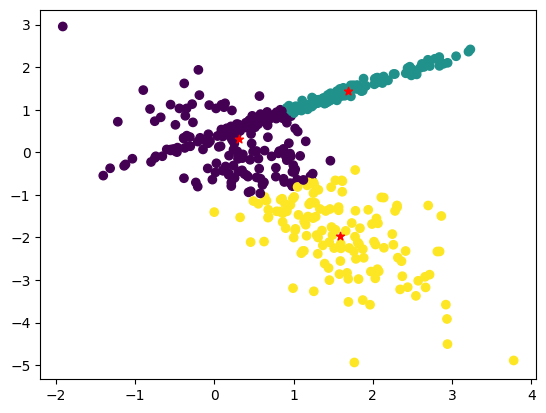

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X1)
labels = kmeans.predict(X1)

# Выводим результаты
plt.scatter(X1[:, 0], X1[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='*', c='r')
plt.show()

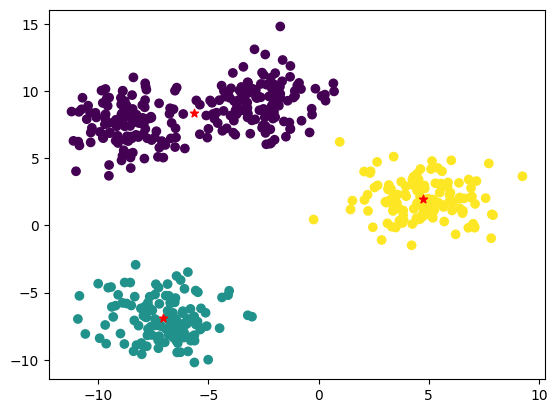

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2)
labels = kmeans.predict(X2)

# Выводим результаты
plt.scatter(X2[:, 0], X2[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='*', c='r')
plt.show()

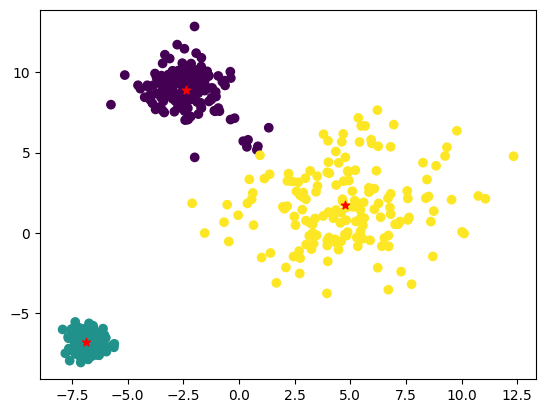

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X3)
labels = kmeans.predict(X3)

# Выводим результаты
plt.scatter(X3[:, 0], X3[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='*', c='r')
plt.show()

## Каждый метод оценивать 2 внешними и 2 внутренними метриками.

In [15]:
# Оценка результатов кластеризации с помощью KMeans
print("KMeans:")
print("Silhouette Score:", silhouette_score(X1, y_pred1_km))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X1, y_pred1_km))
print("Davies-Bouldin Score:", davies_bouldin_score(X1, y_pred1_km))
print("Adjusted Rand Index:", adjusted_rand_score(y1, y_pred1_km))
print("Completeness Score:", completeness_score(y1, y_pred1_km))
print(' ')
# Оценка результатов кластеризации с помощью AgglomerativeClustering
print("AgglomerativeClustering:")
print("Silhouette Score:", silhouette_score(X2, y_pred2_ac))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X2, y_pred2_ac))
print("Davies-Bouldin Score:", davies_bouldin_score(X2, y_pred2_ac))
print("Adjusted Rand Index:", adjusted_rand_score(y2, y_pred2_ac))
print("Completeness Score:", completeness_score(y2, y_pred2_ac))
print(' ')
# Оценка результатов кластеризации с помощью DBSCAN
print("DBSCAN:")
print("Silhouette Score:", silhouette_score(X3, y_pred3_db))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X3, y_pred3_db))
print("Davies-Bouldin Score:", davies_bouldin_score(X3, y_pred3_db))
print("Adjusted Rand Index:", adjusted_rand_score(y3, y_pred3_db))
print("Completeness Score:", completeness_score(y3, y_pred3_db))
print(' ')
# Оценка результатов кластеризации с помощью MeanShift
print("MeanShift:")
print("Silhouette Score:", silhouette_score(X1, y_pred1_ms))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X1, y_pred1_ms))
print("Davies-Bouldin Score:", davies_bouldin_score(X1, y_pred1_ms))
print("Adjusted Rand Index:", adjusted_rand_score(y1, y_pred1_ms))
print("Completeness Score:", completeness_score(y1, y_pred1_ms))
print(' ')
# Оценка результатов кластеризации с помощью SpectralClustering
print("SpectralClustering:")
print("Silhouette Score:", silhouette_score(X2, y_pred2_sc))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X2, y_pred2_sc))
print("Davies-Bouldin Score:", davies_bouldin_score(X2, y_pred2_sc))
print("Adjusted Rand Index:", adjusted_rand_score(y2, y_pred2_sc))
print("Completeness Score:", completeness_score(y2, y_pred2_sc))

KMeans:
Silhouette Score: 0.4125260462292747
Calinski-Harabasz Score: 696.039052974557
Davies-Bouldin Score: 0.791339755195709
Adjusted Rand Index: 0.2255700752664773
Completeness Score: 0.24760219234472292
 
AgglomerativeClustering:
Silhouette Score: 0.5653371289331686
Calinski-Harabasz Score: 538.8551900937157
Davies-Bouldin Score: 0.5705668564242864
Adjusted Rand Index: 0.3319946452476573
Completeness Score: 1.0
 
DBSCAN:
Silhouette Score: 0.39175771434396733
Calinski-Harabasz Score: 507.3706446251397
Davies-Bouldin Score: 1.8289815929758642
Adjusted Rand Index: 0.7859093705705223
Completeness Score: 0.6828519137534422
 
MeanShift:
Silhouette Score: 0.34709789445930256
Calinski-Harabasz Score: 460.1502587488638
Davies-Bouldin Score: 0.6803120421865527
Adjusted Rand Index: 0.15989520103948984
Completeness Score: 0.20616025758800532
 
SpectralClustering:
Silhouette Score: 0.5653371289331686
Calinski-Harabasz Score: 538.8551900937157
Davies-Bouldin Score: 0.5705668564242864
Adjusted Ra

# ЗАДАНИЕ №2.

## На основе датасета для задачи классификации построить модель кластеризации, используя три метода: k-means; иерархическая кластеризация; DBSCAN.

In [16]:
os.chdir('../data')
df_classifier = pd.read_csv('lab4.csv')

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()

numeric_features_classifier = ['time','length'] 
df_classifier[numeric_features_classifier] = scaler.fit_transform(df_classifier[numeric_features_classifier])

In [19]:
from sklearn.model_selection import train_test_split
y = df_classifier["delay"]
X = df_classifier.drop(["delay"], axis=1)
X, _, y, _ = train_test_split(X, y, test_size=0.9, random_state=42)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# kmeans

In [23]:
from sklearn.metrics import silhouette_score, make_scorer
kmeans = KMeans(random_state=42)

parameters = {'n_clusters': [2, 3, 4, 5], 'init': ['k-means++', 'random'], 'n_init': [10, 15, 20]}

grid_search = GridSearchCV(kmeans, parameters)
grid_search.fit(X)

best_kmeans = grid_search.best_estimator_
y_pred_km = best_kmeans.fit_predict(X)

# AgglomerativeClustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering()
parameters = {'n_clusters': [2, 3, 4, 5]}
grid_search = GridSearchCV(agglomerative, parameters, scoring='adjusted_rand_score')
grid_search.fit(X)
best_agglomerative = grid_search.best_estimator_
y_pred_ac = best_agglomerative.fit_predict(X)

C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raevs\Desktop\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _B

# DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
best_dbscan = DBSCAN(eps = 0.5)

y_pred_db = best_dbscan.fit_predict(X)

## Произвести визуализацию построенных моделей.

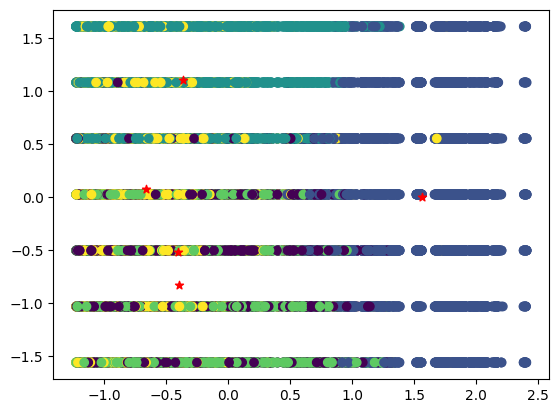

In [33]:
import matplotlib.pyplot as plt

# Выводим результаты
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred_km)
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], marker='*', c='r')
plt.show()

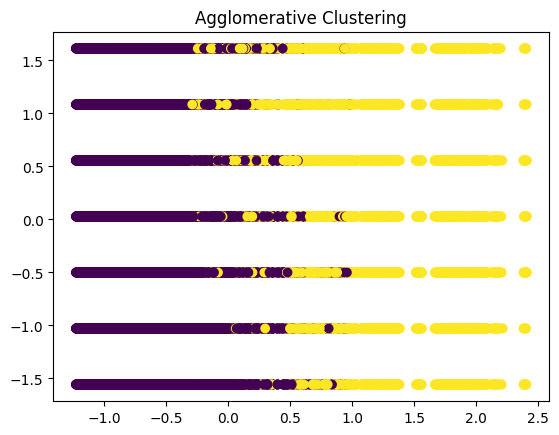

In [35]:
# Выводим результаты
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred_ac)
plt.title("Agglomerative Clustering")
plt.show()

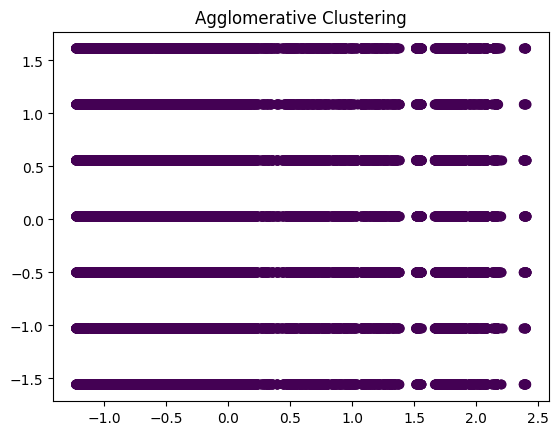

In [37]:
# Выводим результаты
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred_db)
plt.title("Agglomerative Clustering")
plt.show()

## Выполнить оценку качества полученных моделей кластеризации. Сравнить полученные результаты.

Silhouette Score (Коэффициент силуэта):

Значение коэффициента силуэта находится в пределах от -1 до 1.
Большие значения указывают на хорошее разделение кластеров.
Положительные значения означают, что объекты в кластерах более похожи друг на друга, чем на объекты в соседних кластерах.
Отрицательные значения могут возникнуть, когда объекты в кластерах менее похожи друг на друга, чем на объекты в соседних кластерах.

Calinski-Harabasz Score:

Этот показатель оценивает отношение между дисперсией внутри кластеров и дисперсией между кластерами.
Большие значения указывают на более четкое разделение кластеров.
Он рассчитывается как отношение межкластерной дисперсии к внутрикластерной дисперсии.

Davies-Bouldin Score:

Этот показатель измеряет "хорошо-разделенность" кластеров.
Минимальное значение (близкое к нулю) указывает на лучшую кластеризацию.
Рассчитывается как среднее отношение расстояний между кластерами к средней величине внутрикластерных расстояний.

Adjusted Rand Index (Корректированный индекс Ренда):

Этот индекс измеряет схожесть между исходной кластеризацией и предсказанной.
Значение 0 указывает на случайное разделение, а 1 - на идентичное разделение.
Отрицательные значения указывают на случайное разделение.

Completeness Score:

Этот показатель измеряет, насколько каждый кластер содержит только объекты одного класса.
Значение 1 означает, что все объекты одного класса находятся в одном кластере.

In [51]:
# Оценка результатов кластеризации с помощью KMeans
print("KMeans:")
print("Silhouette Score:", silhouette_score(X, y_pred_km))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X, y_pred_km))
print("Davies-Bouldin Score:", davies_bouldin_score(X, y_pred_km))
print("Adjusted Rand Index:", adjusted_rand_score(y, y_pred_km))
print("Completeness Score:", completeness_score(y, y_pred_km))
print(' ')

# Оценка результатов кластеризации с помощью AgglomerativeClustering


print("AgglomerativeClustering:")
print("Silhouette Score:", silhouette_score(X, y_pred_ac))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X, y_pred_ac))
print("Davies-Bouldin Score:", davies_bouldin_score(X, y_pred_ac))
print("Adjusted Rand Index:", adjusted_rand_score(y, y_pred_ac))
print("Completeness Score:", completeness_score(y, y_pred_ac))
print(' ')

# Оценка результатов кластеризации с помощью DBSCAN
print("DBSCAN:")
print("Silhouette Score:", silhouette_score(X, y_pred_db))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X, y_pred_db))
print("Davies-Bouldin Score:", davies_bouldin_score(X, y_pred_db))
print("Adjusted Rand Index:", adjusted_rand_score(y, y_pred_db))
print("Completeness Score:", completeness_score(y, y_pred_db))
print(' ')

KMeans:
Silhouette Score: 0.10561116735697076
Calinski-Harabasz Score: 2845.0961590871498
Davies-Bouldin Score: 2.026248707557842
Adjusted Rand Index: 0.006780961947358766
Completeness Score: 0.005296313352762925
 
AgglomerativeClustering:
Silhouette Score: 0.1279191221226599
Calinski-Harabasz Score: 3657.654267558492
Davies-Bouldin Score: 2.3920862467308805
Adjusted Rand Index: -0.010108317858089397
Completeness Score: 0.004894743307979925
 
DBSCAN:
Silhouette Score: -0.04279593965911055
Calinski-Harabasz Score: 4.140120160516125
Davies-Bouldin Score: 1.188451832297087
Adjusted Rand Index: 0.0001536591317194697
Completeness Score: 0.014927079977973932
 


# ЗАДАНИЕ №3*. Реализовать алгоритма DBSCAN и с его помощью провести кластеризацию всех датасетов Лаб_работы №6.

In [39]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def DBSCAN(data, eps, min_samples):
    # Создаем пустой список, в который будем добавлять индексы точек, принадлежащих кластерам
    cluster_labels = [0] * len(data)
    
    # Инициализируем переменную cluster_id, которая будет служить идентификатором кластера
    cluster_id = 1
    
    # Создаем объект NearestNeighbors для поиска соседей каждой точки
    nbrs = NearestNeighbors(n_neighbors=min_samples, metric='euclidean').fit(data)
    
    # Получаем матрицу расстояний исходных данных
    distances, indices = nbrs.kneighbors(data)
    
    # Инициализируем список visited для отслеживания точек, которые уже были посещены
    visited = [False] * len(data)
    
    # Для каждой точки в наборе данных выполняем алгоритм DBSCAN
    for i in range(len(data)):
        if not visited[i]:
            visited[i] = True
            
            # Поиск соседей текущей точки
            neighbors = indices[i][1:]
            
            if len(neighbors) < min_samples:
                # Если количество соседей меньше min_samples, помечаем точку как шум
                cluster_labels[i] = -1
            else:
                # Иначе, расширение кластера
                expand_cluster(i, neighbors, cluster_id, cluster_labels, visited, distances, eps, min_samples)
                cluster_id += 1  # Увеличиваем идентификатор кластера для следующей итерации
                
    return cluster_labels

def expand_cluster(i, neighbors, cluster_id, cluster_labels, visited, distances, eps, min_samples):
    # Помечаем текущую точку как часть кластера
    cluster_labels[i] = cluster_id
    
    # Итеративно ищем и добавляем новые точки кластера
    j = 0
    while j < len(neighbors):
        neighbor_index = neighbors[j]
        
        if not visited[neighbor_index]:
            visited[neighbor_index] = True
            
            # Поиск соседей новой точки
            new_neighbors = indices[neighbor_index][1:]
            
            if len(new_neighbors) >= min_samples:
                # Если количество соседей больше min_samples, расширяем кластер
                neighbors = np.concatenate((neighbors, new_neighbors))
            
        # Проверяем, не была ли точка ранее помечена как шум или часть кластера
        if cluster_labels[neighbor_index] == 0:
            cluster_labels[neighbor_index] = cluster_id
        
        j += 1

In [55]:
eps = 2.0
min_pts = 2

labels = DBSCAN(X, eps, min_pts)

print("Completeness Score:", completeness_score(y, labels))

Completeness Score: 1.0


In [56]:
labels1 = DBSCAN(X1, eps, min_pts)

print("Completeness Score:", completeness_score(y1, labels1))

Completeness Score: 1.0


In [57]:
labels3 = DBSCAN(X3, eps, min_pts)

print("Completeness Score:", completeness_score(y3, labels3))

Completeness Score: 1.0


In [58]:
labels2 = DBSCAN(X2, eps, min_pts)

print("Completeness Score:", completeness_score(y2, labels2))

Completeness Score: 1.0
